In [36]:
import geopandas
import contextily as cx

In [63]:
data_dir = '/Users/samrelins/Documents/BIHR/transport_proj/data'
gdf = geopandas.read_file(data_dir + "/Lower_Layer_Super_Output_Areas__December_2011__Boundaries_Full_Clipped__BFC__EW_V3-shp")
gdf

,OBJECTID,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,Shape__Are,Shape__Len,geometry
0,1,E01000001,City of London 001A,532123,181632,-0.097140,51.5182,2635.767993,1.298653e+05,2635.767993,"POLYGON ((532151.537 181867.433, 532152.500 18..."
1,2,E01000002,City of London 001B,532480,181715,-0.091970,51.5188,2707.881853,2.284196e+05,2707.881853,"POLYGON ((532634.497 181926.016, 532632.048 18..."
2,3,E01000003,City of London 001C,532239,182033,-0.095320,51.5217,1224.638192,5.905435e+04,1224.638192,"POLYGON ((532153.703 182165.155, 532158.250 18..."
3,4,E01000005,City of London 001E,533581,181283,-0.076270,51.5147,2275.805348,1.895777e+05,2275.805348,"POLYGON ((533619.062 181402.364, 533639.868 18..."
4,5,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.5387,1966.092607,1.465370e+05,1966.092607,"POLYGON ((545126.852 184310.838, 545145.213 18..."
...,...,...,...,...,...,...,...,...,...,...,...
34748,34749,W01001954,Cardiff 006F,312959,180574,-3.255820,51.5173,5567.813286,6.400342e+05,5567.813286,"POLYGON ((312747.367 181262.100, 312751.477 18..."
34749,34750,W01001955,Swansea 025F,265633,193182,-3.942370,51.6214,6037.602710,6.871190e+05,6037.602710,"POLYGON ((265804.688 194161.261, 265815.000 19..."
34750,34751,W01001956,Swansea 023E,260586,192621,-4.015000,51.6151,13127.898240,2.500337e+06,13127.898240,"POLYGON ((259961.000 194979.500, 259969.094 19..."
34751,34752,W01001957,Swansea 025G,265337,192555,-3.946400,51.6157,2829.597133,2.139171e+05,2829.597133,"POLYGON ((265154.000 192746.000, 265156.000 19..."


In [68]:
hw_lsoas = ["E01010612",  "E01010819", "E01010820", "E01010821", "E01010822"]
brad_mask = gdf.LSOA11NM.str.contains("Bradford")
brad_gdf = gdf[brad_mask].to_crs(epsg=3857)

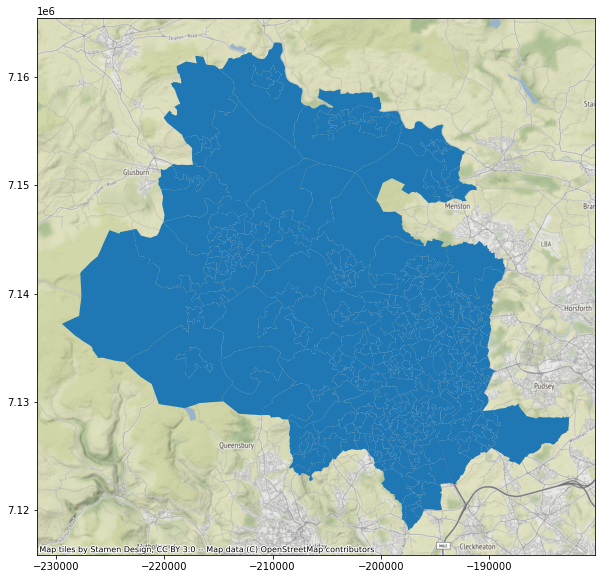

In [75]:
ax = brad_gdf.plot(aspect=1, figsize=(10,10))
cx.add_basemap(ax)

In [76]:
brad_gdf.total_bounds

array([-229457.09807493, 7118118.77512436, -182600.04743408,
       7163180.64385127])

In [77]:
hw_lsoas = ["E01010612",  "E01010819", "E01010820", "E01010821", "E01010822"]
hw_mask = gdf.LSOA11CD.isin(hw_lsoas)
hw_gdf = gdf[hw_mask].to_crs(epsg=3857)

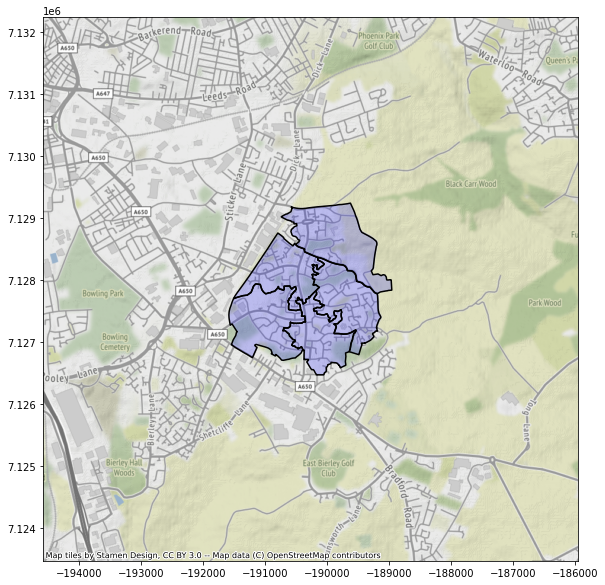

In [105]:
zoom_level = 3000

minx, miny, maxx, maxy = hw_gdf.total_bounds
ax = hw_gdf.boundary.plot(aspect=1, figsize=(10,10), color="black")
hw_gdf.plot(aspect=1, figsize=(10,10), color="blue", alpha=0.2, ax=ax)
ax.set_xlim(minx - zoom_level, maxx + zoom_level)
ax.set_ylim(miny - zoom_level, maxy + zoom_level)
cx.add_basemap(ax)
